In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread
import matplotlib.cbook as cbook
%matplotlib inline
#df = pd.read_csv("Crimes_-_2001_to_present.csv", nrows=5)
#df = pd.read_csv("Crimes_-_2001_to_present.csv", usecols = ['Date','Block','Primary Type','Description','Location Description','Year','Latitude','Longitude'])
df = pd.read_csv("Crimes_-_2001_to_present.csv", usecols = ['Date','Primary Type','Description','Location Description','Year','Latitude','Longitude'])
df.head()

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude
0,06/19/2007 04:36:28 PM,CRIMINAL DAMAGE,TO VEHICLE,SIDEWALK,2007,42.011510,-87.668909
1,06/19/2007 08:33:00 AM,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING/PROPERTY,2007,41.796688,-87.684111
2,06/20/2007 11:25:00 AM,ASSAULT,SIMPLE,RESIDENCE,2007,41.889124,-87.723464
3,06/20/2007 09:26:00 PM,BATTERY,SIMPLE,RESIDENCE,2007,41.726958,-87.598534
4,06/19/2007 10:10:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,2007,41.824684,-87.687347


In [2]:
df.head(20)

,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude
0,06/19/2007 04:36:28 PM,CRIMINAL DAMAGE,TO VEHICLE,SIDEWALK,2007,42.011510,-87.668909
1,06/19/2007 08:33:00 AM,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING/PROPERTY,2007,41.796688,-87.684111
2,06/20/2007 11:25:00 AM,ASSAULT,SIMPLE,RESIDENCE,2007,41.889124,-87.723464
3,06/20/2007 09:26:00 PM,BATTERY,SIMPLE,RESIDENCE,2007,41.726958,-87.598534
4,06/19/2007 10:10:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,2007,41.824684,-87.687347
5,06/19/2007 07:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,2007,41.968925,-87.748977
6,06/19/2007 09:05:00 AM,THEFT,RETAIL THEFT,DEPARTMENT STORE,2007,41.914036,-87.653869
7,06/14/2007 06:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,2007,41.878517,-87.751395
8,06/19/2007 08:30:00 PM,CRIMINAL TRESPASS,TO LAND,GAS STATION,2007,41.773405,-87.625143
9,06/20/2007 10:10:00 PM,ROBBERY,STRONGARM - NO WEAPON,STREET,2007,41.934823,-87.773964


In [3]:
df['Location Description'].value_counts().head(60)

STREET                               1703896
RESIDENCE                            1090859
APARTMENT                             658422
SIDEWALK                              641679
OTHER                                 243845
PARKING LOT/GARAGE(NON.RESID.)        184927
ALLEY                                 145199
SCHOOL, PUBLIC, BUILDING              138236
RESIDENCE-GARAGE                      127072
RESIDENCE PORCH/HALLWAY               112689
SMALL RETAIL STORE                    110972
VEHICLE NON-COMMERCIAL                102711
RESTAURANT                             97225
GROCERY FOOD STORE                     83403
DEPARTMENT STORE                       78268
GAS STATION                            67650
RESIDENTIAL YARD (FRONT/BACK)          63662
CHA PARKING LOT/GROUNDS                54877
PARK PROPERTY                          50385
COMMERCIAL / BUSINESS OFFICE           47217
CTA PLATFORM                           35211
CHA APARTMENT                          35197
BAR OR TAV

In [4]:
df.columns

Index([u'Date', u'Primary Type', u'Description', u'Location Description',
       u'Year', u'Latitude', u'Longitude'],
      dtype='object')

In [5]:
am_pm= [i[-2:] for i in df["Date"]]
#df1['AM/PM'] = am_pm
time= [int(i[11:13]) for i in df["Date"]]
time = [time[i] + 12 if ((am_pm[i] == 'PM') & (time[i] != 12)) else time[i] for i in xrange(len(time))]
df["TIME"] = time
df.head()

,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude,TIME
0,06/19/2007 04:36:28 PM,CRIMINAL DAMAGE,TO VEHICLE,SIDEWALK,2007,42.011510,-87.668909,16
1,06/19/2007 08:33:00 AM,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING/PROPERTY,2007,41.796688,-87.684111,8
2,06/20/2007 11:25:00 AM,ASSAULT,SIMPLE,RESIDENCE,2007,41.889124,-87.723464,11
3,06/20/2007 09:26:00 PM,BATTERY,SIMPLE,RESIDENCE,2007,41.726958,-87.598534,21
4,06/19/2007 10:10:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,2007,41.824684,-87.687347,22


In [6]:
month= [i[:2] for i in df["Date"]]
#df1['AM/PM'] = am_pm
df["MONTH"] = month
df.head()

,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude,TIME,MONTH
0,06/19/2007 04:36:28 PM,CRIMINAL DAMAGE,TO VEHICLE,SIDEWALK,2007,42.011510,-87.668909,16,06
1,06/19/2007 08:33:00 AM,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING/PROPERTY,2007,41.796688,-87.684111,8,06
2,06/20/2007 11:25:00 AM,ASSAULT,SIMPLE,RESIDENCE,2007,41.889124,-87.723464,11,06
3,06/20/2007 09:26:00 PM,BATTERY,SIMPLE,RESIDENCE,2007,41.726958,-87.598534,21,06
4,06/19/2007 10:10:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,2007,41.824684,-87.687347,22,06


In [7]:
df[~df['Location Description'].isin(['RESIDENCE','APARTMENT','RESIDENCE-GARAGE','RESIDENCE PORCH/HALLWAY','RESIDENTIAL YARD (FRONT/BACK)'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390640 entries, 0 to 6443343
Data columns (total 9 columns):
Date                    object
Primary Type            object
Description             object
Location Description    object
Year                    int64
Latitude                float64
Longitude               float64
TIME                    int64
MONTH                   object
dtypes: float64(2), int64(2), object(5)
memory usage: 335.0+ MB


In [8]:
df_street = df[~df['Location Description'].isin(['RESIDENCE','APARTMENT','RESIDENCE-GARAGE','RESIDENCE PORCH/HALLWAY','RESIDENTIAL YARD (FRONT/BACK)'])].copy()
df_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390640 entries, 0 to 6443343
Data columns (total 9 columns):
Date                    object
Primary Type            object
Description             object
Location Description    object
Year                    int64
Latitude                float64
Longitude               float64
TIME                    int64
MONTH                   object
dtypes: float64(2), int64(2), object(5)
memory usage: 335.0+ MB


In [9]:
df_street.head(20)

,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude,TIME,MONTH
0,06/19/2007 04:36:28 PM,CRIMINAL DAMAGE,TO VEHICLE,SIDEWALK,2007,42.011510,-87.668909,16,06
1,06/19/2007 08:33:00 AM,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING/PROPERTY,2007,41.796688,-87.684111,8,06
4,06/19/2007 10:10:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,2007,41.824684,-87.687347,22,06
6,06/19/2007 09:05:00 AM,THEFT,RETAIL THEFT,DEPARTMENT STORE,2007,41.914036,-87.653869,9,06
8,06/19/2007 08:30:00 PM,CRIMINAL TRESPASS,TO LAND,GAS STATION,2007,41.773405,-87.625143,20,06
9,06/20/2007 10:10:00 PM,ROBBERY,STRONGARM - NO WEAPON,STREET,2007,41.934823,-87.773964,22,06
11,06/19/2007 06:18:00 AM,THEFT,OVER $500,WAREHOUSE,2007,41.849992,-87.671959,6,06
13,06/21/2007 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,2007,41.802065,-87.618685,12,06
14,06/20/2007 09:45:00 AM,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,GAS STATION,2007,41.767449,-87.585957,9,06
15,06/20/2007 08:00:00 PM,BATTERY,SIMPLE,SIDEWALK,2007,41.718649,-87.552403,20,06


In [10]:
df_street['Location Description'].value_counts()

STREET                             1703896
SIDEWALK                            641679
OTHER                               243845
PARKING LOT/GARAGE(NON.RESID.)      184927
ALLEY                               145199
SCHOOL, PUBLIC, BUILDING            138236
SMALL RETAIL STORE                  110972
VEHICLE NON-COMMERCIAL              102711
RESTAURANT                           97225
GROCERY FOOD STORE                   83403
DEPARTMENT STORE                     78268
GAS STATION                          67650
CHA PARKING LOT/GROUNDS              54877
PARK PROPERTY                        50385
COMMERCIAL / BUSINESS OFFICE         47217
CTA PLATFORM                         35211
CHA APARTMENT                        35197
BAR OR TAVERN                        33528
DRUG STORE                           29295
SCHOOL, PUBLIC, GROUNDS              27796
HOTEL/MOTEL                          26324
BANK                                 26250
CHA HALLWAY/STAIRWELL/ELEVATOR       24634
VACANT LOT/

In [11]:
df_street = df_street.dropna(axis = 0, how = "any").copy()
df_street['Location Description'].value_counts()

STREET                            1687460
SIDEWALK                           636118
OTHER                              238037
PARKING LOT/GARAGE(NON.RESID.)     182826
ALLEY                              144088
SCHOOL, PUBLIC, BUILDING           137092
SMALL RETAIL STORE                 109985
VEHICLE NON-COMMERCIAL             100441
RESTAURANT                          96254
GROCERY FOOD STORE                  82864
DEPARTMENT STORE                    77703
GAS STATION                         67094
CHA PARKING LOT/GROUNDS             54467
PARK PROPERTY                       49538
COMMERCIAL / BUSINESS OFFICE        46419
CTA PLATFORM                        34930
CHA APARTMENT                       34866
BAR OR TAVERN                       33148
DRUG STORE                          29068
SCHOOL, PUBLIC, GROUNDS             27568
HOTEL/MOTEL                         26006
BANK                                25515
CHA HALLWAY/STAIRWELL/ELEVATOR      24458
VACANT LOT/LAND                   

In [12]:
df_street[df_street.Year == 2017].head()


,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude,TIME,MONTH
5677940,01/01/2017 01:00:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,2017,41.903933,-87.629129,1,01
5677941,01/01/2017 01:23:00 AM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,2017,41.740579,-87.647394,1,01
5678651,01/01/2017 01:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,2017,41.848906,-87.695365,1,01
5678656,01/01/2017 05:00:00 AM,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,2017,41.741094,-87.616269,5,01
5678658,01/01/2017 05:11:00 PM,ASSAULT,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,2017,41.747780,-87.669436,17,01


In [13]:
df1 = df_street[(df_street.Latitude <= 41.857794) & (df_street.Latitude >= 41.847340) &(df_street.Longitude >= -87.641189) & (df_street.Longitude <= -87.628892)].copy()
#df1 = df_street[(df.Latitude <= 41.85) & (df_street.Latitude >= 41.84) &(df1.Longitude <= -87.62) & (df1.Longitude >= -87.64)].copy()
len(df1.index)

9948

In [14]:
df_China_Town = df1.copy()
len(df_China_Town.index)

9948

In [15]:
df_China_Town["Primary Type"].value_counts()

THEFT                               3635
CRIMINAL DAMAGE                     1239
BATTERY                             1085
ROBBERY                              747
DECEPTIVE PRACTICE                   561
MOTOR VEHICLE THEFT                  542
NARCOTICS                            474
BURGLARY                             361
ASSAULT                              358
CRIMINAL TRESPASS                    349
OTHER OFFENSE                        269
GAMBLING                              73
LIQUOR LAW VIOLATION                  39
WEAPONS VIOLATION                     38
PUBLIC PEACE VIOLATION                32
SEX OFFENSE                           31
ARSON                                 27
INTERFERENCE WITH PUBLIC OFFICER      20
CRIM SEXUAL ASSAULT                   17
OFFENSE INVOLVING CHILDREN            17
PROSTITUTION                          13
STALKING                               6
INTIMIDATION                           6
KIDNAPPING                             4
HOMICIDE        

In [16]:
df_China_Town[df_China_Town["Primary Type"].isin(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])].count()

Date                    7625
Primary Type            7625
Description             7625
Location Description    7625
Year                    7625
Latitude                7625
Longitude               7625
TIME                    7625
MONTH                   7625
dtype: int64

In [17]:
df_Offense_china_town = df_China_Town[df_China_Town["Primary Type"].isin(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])].copy()
df_Offense_china_town.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 1188 to 6442206
Data columns (total 9 columns):
Date                    7625 non-null object
Primary Type            7625 non-null object
Description             7625 non-null object
Location Description    7625 non-null object
Year                    7625 non-null int64
Latitude                7625 non-null float64
Longitude               7625 non-null float64
TIME                    7625 non-null int64
MONTH                   7625 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 595.7+ KB


In [18]:
df_Offense_china_town["Primary Type"].value_counts()

THEFT                 3635
CRIMINAL DAMAGE       1239
BATTERY               1085
ROBBERY                747
DECEPTIVE PRACTICE     561
ASSAULT                358
Name: Primary Type, dtype: int64

In [19]:
#df_Offense_china_town.Latitude.max()

In [20]:
#df_Offense_china_town.Latitude.min()

In [21]:
#df_Offense_china_town.Longitude.max()

In [22]:
#df_Offense_china_town.Longitude.min()

In [23]:
#df_Offense_china_town.groupby(['Latitude', 'Longitude']).count()

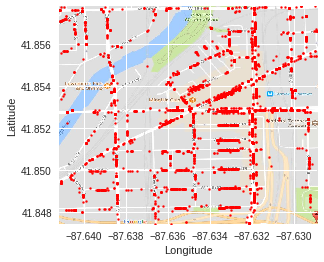

In [24]:
datafile = cbook.get_sample_data('./China_Town.jpg')
img = imread(datafile)
plt.xlim(-87.641181412999998, -87.628895526000008)
plt.ylim(41.847455578999998, 41.857793641999997)

plt.scatter(df_Offense_china_town.Longitude, df_Offense_china_town.Latitude, s=4, color = 'r')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.imshow(img, zorder=0, extent=[-87.641181412999998, -87.628895526000008, 41.847455578999998, 41.857793641999997])


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


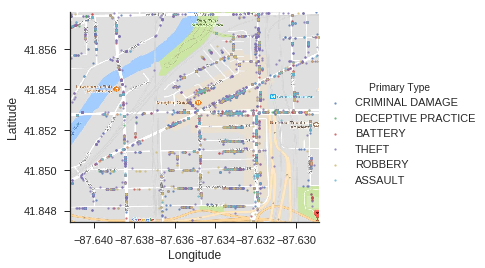

In [25]:
datafile = cbook.get_sample_data('./China_Town.jpg')
img = imread(datafile)
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
ax = sns.lmplot('Longitude', # Horizontal axis
           'Latitude', # Vertical axis
           data=df_Offense_china_town, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Primary Type", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 5}) # S marker size
ax.set(xlim=(-87.641181412999998, -87.628895526000008))
ax.set(ylim=(41.847455578999998, 41.857793641999997))
plt.imshow(img, zorder=0, extent=[-87.641181412999998, -87.628895526000008, 41.847455578999998, 41.857793641999997])

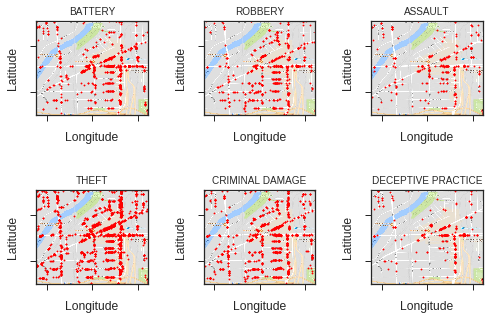

In [26]:
type = ['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE']
datafile = cbook.get_sample_data('./China_Town.jpg')
img = imread(datafile)
plt.xlim(-87.641181412999998, -87.628895526000008)
plt.ylim(41.847455578999998, 41.857793641999997)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
for i in range(len(type)):
    plt.subplot(2,3,i+1)
    plt.gca().set_title(type[i], fontsize=10)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.scatter(df_Offense_china_town[df_Offense_china_town['Primary Type'] == type[i]].Longitude, df_Offense_china_town[df_Offense_china_town['Primary Type'] == type[i]].Latitude, s=2,color = 'r')
    plt.imshow(img, zorder=0, extent=[-87.641181412999998, -87.628895526000008, 41.847455578999998, 41.857793641999997])
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
plt.savefig("./test.png", dpi = 216)

In [27]:
type_yearly_count = df_street.groupby(['Year','Primary Type']).size().reset_index(name = 'Counts')
type_yearly_count.head()

,Year,Primary Type,Counts
0,2001,ARSON,614
1,2001,ASSAULT,20268
2,2001,BATTERY,55239
3,2001,BURGLARY,6086
4,2001,CRIM SEXUAL ASSAULT,792


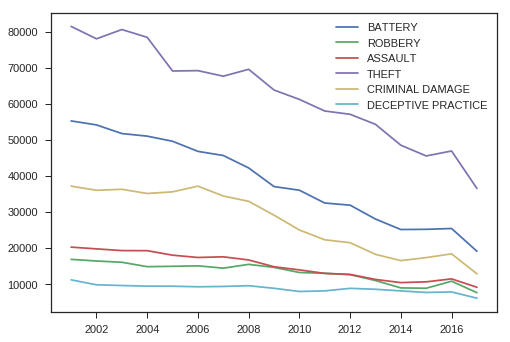

In [28]:
#ype_yearly_count[type_yearly_count['Primary Type'] == 'BATTERY']['Counts']
for i in ['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE']:
    plt.plot(type_yearly_count[type_yearly_count['Primary Type'] == i].Year, type_yearly_count[type_yearly_count['Primary Type'] == i].Counts)
plt.legend(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])     

In [29]:
type_yearly_count = df_Offense_china_town.groupby(['Year','Primary Type']).size().reset_index(name = 'Counts')
type_yearly_count.head(20)

,Year,Primary Type,Counts
0,2001,ASSAULT,31
1,2001,BATTERY,69
2,2001,CRIMINAL DAMAGE,100
3,2001,DECEPTIVE PRACTICE,45
4,2001,ROBBERY,44
5,2001,THEFT,367
6,2002,ASSAULT,22
7,2002,BATTERY,74
8,2002,CRIMINAL DAMAGE,94
9,2002,DECEPTIVE PRACTICE,23


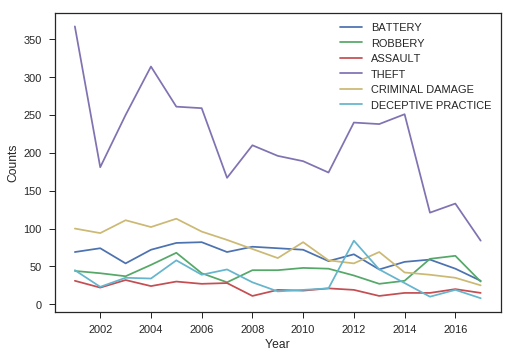

In [30]:
for i in ['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE']:
#    y = type_yearly_count[type_yearly_count['Primary Type'] == i].Counts
    plt.plot(type_yearly_count[type_yearly_count['Primary Type'] == i].Year, type_yearly_count[type_yearly_count['Primary Type'] == i].Counts)
    plt.xlabel("Year")
    plt.ylabel("Counts")
plt.legend(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])   

In [31]:
yearly_count = df_Offense_china_town.groupby(['Year']).size().reset_index(name = 'Counts')
yearly_count.head()

,Year,Counts
0,2001,656
1,2002,435
2,2003,519
3,2004,598
4,2005,611


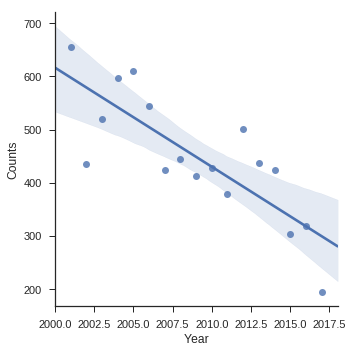

In [32]:
#plt.plot(street_yearly_count.Year, street_yearly_count.Counts)
sns.lmplot(x='Year' ,y='Counts',data=yearly_count,fit_reg=True) 

In [33]:
df_Offense_china_town.info()
df_Offense_china_town.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 1188 to 6442206
Data columns (total 9 columns):
Date                    7625 non-null object
Primary Type            7625 non-null object
Description             7625 non-null object
Location Description    7625 non-null object
Year                    7625 non-null int64
Latitude                7625 non-null float64
Longitude               7625 non-null float64
TIME                    7625 non-null int64
MONTH                   7625 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 915.7+ KB


,Date,Primary Type,Description,Location Description,Year,Latitude,Longitude,TIME,MONTH
1188,06/20/2007 06:10:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,2007,41.850965,-87.632841,18,06
2412,06/23/2007 01:24:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,2007,41.851441,-87.632736,1,06
3450,05/01/2007 12:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,BOAT/WATERCRAFT,2007,41.854460,-87.638650,12,05
4253,06/24/2007 10:11:30 PM,CRIMINAL DAMAGE,TO VEHICLE,TAXICAB,2007,41.852879,-87.629527,22,06
4902,06/20/2007 09:05:00 AM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,2007,41.852868,-87.630915,9,06


In [34]:
type_daily_count = df_Offense_china_town.groupby(['TIME','Primary Type']).size().reset_index(name = 'Counts')
type_daily_count.head(20)

,TIME,Primary Type,Counts
0,1,ASSAULT,11
1,1,BATTERY,60
2,1,CRIMINAL DAMAGE,45
3,1,DECEPTIVE PRACTICE,10
4,1,ROBBERY,34
5,1,THEFT,60
6,2,ASSAULT,9
7,2,BATTERY,57
8,2,CRIMINAL DAMAGE,40
9,2,DECEPTIVE PRACTICE,7


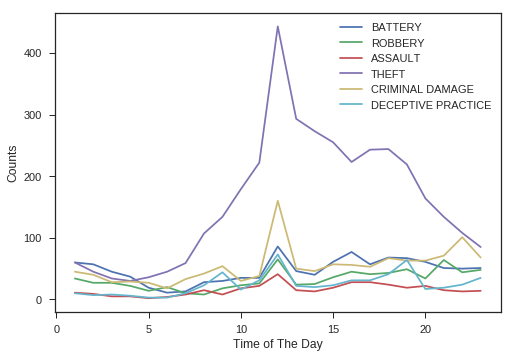

In [35]:
for i in ['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE']:
#    y = type_yearly_count[type_yearly_count['Primary Type'] == i].Counts
    plt.plot(type_daily_count[type_daily_count['Primary Type'] == i].TIME, type_daily_count[type_daily_count['Primary Type'] == i].Counts)
    plt.xlabel("Time of The Day")
    plt.ylabel("Counts")
plt.legend(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])   

In [40]:
type_monthly_count = df_Offense_china_town.groupby(['MONTH','Primary Type']).size().reset_index(name = 'Counts')
type_monthly_count.head(20)

,MONTH,Primary Type,Counts
0,01,ASSAULT,17
1,01,BATTERY,57
2,01,CRIMINAL DAMAGE,88
3,01,DECEPTIVE PRACTICE,57
4,01,ROBBERY,70
5,01,THEFT,276
6,02,ASSAULT,20
7,02,BATTERY,59
8,02,CRIMINAL DAMAGE,89
9,02,DECEPTIVE PRACTICE,36


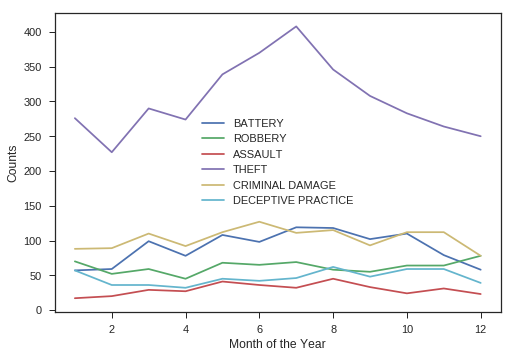

In [41]:
for i in ['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE']:
#    y = type_yearly_count[type_yearly_count['Primary Type'] == i].Counts
    plt.plot(type_monthly_count[type_monthly_count['Primary Type'] == i].MONTH, type_monthly_count[type_monthly_count['Primary Type'] == i].Counts)
    plt.xlabel("Month of the Year")
    plt.ylabel("Counts")
plt.legend(['BATTERY', 'ROBBERY', 'ASSAULT', 'THEFT',  'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE'])   